<span style="font-size:28pt; font-weight: bold;">Prepaid Package Revenue Stream Analysis</span>


<span id="contents" style="font-size:20pt; font-weight: bold;">Contents</span>

1. [Initialization](#Initialization)
   - [Analysis Background](#Analysis-Background)
   - [Data Loading](#Data-Loading)
   


2. [Data Preparation](#Data-Preparation)
   - [Prepaid Packages](#Prepaid-Packages)
       - [Prepaid Packages Data Refinement](#Prepaid-Packages-Data-Refinement)
       - [Prepaid Packages Data Quality Enhancement](#Prepaid-Packages-Data-Quality-Enhancement)
   - [Users](#Users)
       - [Users Data Refinement](#Users-Data-Refinement)
       - [Users Data Quality Enhancement](#Users-Data-Quality-Enhancement)
   - [Phone Call](#Phone-Call)
       - [Phone Call Data Refinement](#Phone-Call-Data-Refinement)
       - [Phone Call Data Quality Enhancement](#Phone-Call-Data-Quality-Enhancement)
   - [Text Message](#Text-Message)
       - [Text Message Data Refinement](#Text-Message-Data-Refinement)
       - [Text Message Data Quality Enhancement](#Text-Message-Data-Quality-Enhancement)
   - [Internet](#Internet)
       - [Internet Data Refinement](#Internet-Data-Refinement)
       - [Internet Data Quality Enhancement](#Internet-Data-Quality-Enhancement)
   
   
       
3. [Analysis](#Analysis)
   - [Package Terms and Condition](#Package-Terms-and-Condition)
   - [Aggregated Data per User](#Aggregated-Data-per-User)
   - [Users Behaviour](#Users-Behaviour)
       - [Phone Call Activity](#Phone-Call-Activity)
       - [Text Messaging Activity](#Text-Messaging-Activity)
       - [Web Session Activity](#Web-Session-Activity)
   - [Revenue](#Revenue)
       
     
     
4. [Hypothesis Testing](#Hypothesis-Testing)
   - [Average Revenue by Package](#Average-Revenue-by-Package)
   - [Average Revenue by Location](#Average-Revenue-by-Location)



5. [Findings and Conclusion](#Findings-and-Conclusion)


# Initialization

## Analysis Background

**Megaline** is a telecommunications operator offering two types of prepaid plans: the **Surf** plan and the **Ultimate** plan. As part of a marketing budget evaluation, the advertising department seeks to determine which prepaid plan generates higher revenue, enabling them to allocate advertising budgets more effectively.

This report presents a preliminary analysis of these prepaid plans based on a relatively small sample of clients. The dataset includes 500 Megaline clients and contains information such as demographic details, geographic location, the type of plan they use, as well as the number of calls made and messages sent in 2018. 

The objective of this analysis is to examine user behavior and **identify which prepaid plan generates greater revenue for the company.**

The report is organized into five sections: initialization, data preparation, data analysis, hypothesis testing, and findings and conclusion.

In [1]:
# Import Library data processing
import pandas as pd, numpy as np

#Import Library data visualization
import matplotlib.pyplot as plt, seaborn as sns

#Import Library Statistics
from scipy.stats import ttest_ind
import scipy.stats as stats

#Import Library Statistical Testing
from scipy.stats import ttest_1samp, shapiro, mannwhitneyu, chi2_contingency

## Data Loading

The analysis involves five separate DataFrames, each consists data regarding users, prepaid packages, phone call log, text message log, and web session (internet usage). 

In [2]:
#loading data of users
user = pd.read_csv('/datasets/megaline_users.csv')
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [3]:
#loading data of prepaid packages
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [4]:
#loading data of phone calls
call = pd.read_csv('/datasets/megaline_calls.csv')
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
#loading data of text message (SMS)
sms = pd.read_csv('/datasets/megaline_messages.csv')
sms.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
#loading data of web session activity (internet)
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Back to Contents](#contents)

# Data Preparation

This section focuses on examining the general information of each dataframe to identify any missing or duplicate values, and subsequently addressing them.

Additionally, necessary data transformations will be performed to improve data quality. After briefly observing the initial portion of each dataframe in Section 1, one of the required transformations is to **merge the five dataframes into a single one** and ensure that **each row is defined in monthly units**.

## Prepaid Packages

In [7]:
#load general info of prepaid packages dataframe
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
#display dataframe
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The columns in this dataframe contain information on the benefits and surcharge rates of the two prepaid plans offered, Surf and Ultimate.

For marketing purposes, Megaline uses gigabytes (GB) as the unit for internet service data. However, in the data collected for this analysis, the unit used is megabytes (MB), where **1 GB = 1,024 MB**.

There are no missing values in this dataset, and all columns have the correct data types.

### Prepaid Packages Data Refinement

The column name `mb_per_month_included` is too long for a benefit that is clearly measured on a monthly basis. For readability, this column name has been shortened to **mb_included**.

In [9]:
plans = plans.rename(columns={'mb_per_month_included': 'mb_included'})
plans

,messages_included,mb_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Column **mb_per_month_included** has been renamed to **mb_included**

### Prepaid Packages Data Quality Enhancement

The `mb_included` column contains information about the internet data included in the plan, measured in megabytes. A new column in gigabytes needs to be added.

In [10]:
# column for internet quota in gigabyte
plans['gb_included'] = plans['mb_included'] / 1024

# drop column 'mb_included'
plans.drop('mb_included', axis=1, inplace=True)
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


[Back to Data Preparation](#Data-Preparation)

## Users

In [11]:
# general info of DataFrame 'user'
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# sample of users data
user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaN
146,1146,Loma,Mcneil,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-13,surf,NaN
35,1035,Jeff,Cummings,67,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-12-08,surf,NaN
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,NaN
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,NaN


In [13]:
# check duplicate in dataframe
print('user duplicate: ', user.duplicated().sum())

user duplicate:  0


The number of non-null values matches the sample size (500) for nearly all columns, except for the `churn_date` column.

The `churn_date` column contains information about the **date of subscription termination**. If a value is missing in this column, it means the user is **still subscribed**, rather than indicating a missing value. Based on this information, we can infer that 34 users have unsubscribed, while 466 users remain subscribed.

Regarding data types, most columns have the correct data types. However, two columns, `reg_date` (subscription start date) and `churn_date`, need to be converted to **datetime** format.

There are no duplicate records in the user data.

### Users Data Refinement

Change the data type of column `churn_date` from object to **datetime**

In [14]:
# change data type to datetime in yyyy-mm-dd
user['churn_date'] = pd.to_datetime(user['churn_date'], format='%Y-%m-%d')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    object        
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Users Data Quality Enhancement

For the hypothesis testing, user behavior data from the **NY-NJ region** is required to enable comparisons with other regions. As a result, the data must be prepared to categorize users according to their region.

This process will begin by analyzing the regions of residence recorded for the users in this dataframe.

In [15]:
#display unique values in column 'city'
user['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Stockton, CA MSA                                    1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
El Paso, TX MSA                                     1
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

Based on the city name format in this dataset, the state information appears after a comma and is represented by a two-letter abbreviation. To filter users from the NY-NJ region, city information needs to be organized into a list. The list will contain two elements: the full name of the city (without abbreviations) and the state abbreviation.

In [16]:
#list of city name and state name
user['city'].str.split(', ')

0          [Atlanta-Sandy Springs-Roswell, GA MSA]
1                [Seattle-Tacoma-Bellevue, WA MSA]
2           [Las Vegas-Henderson-Paradise, NV MSA]
3                                  [Tulsa, OK MSA]
4                [Seattle-Tacoma-Bellevue, WA MSA]
                          ...                     
495    [New York-Newark-Jersey City, NY-NJ-PA MSA]
496                 [New Orleans-Metairie, LA MSA]
497       [Los Angeles-Long Beach-Anaheim, CA MSA]
498    [New York-Newark-Jersey City, NY-NJ-PA MSA]
499            [Orlando-Kissimmee-Sanford, FL MSA]
Name: city, Length: 500, dtype: object

In [17]:
#info of state names only (index 1)
user['city'].str.split(', ').str[1]

0            GA MSA
1            WA MSA
2            NV MSA
3            OK MSA
4            WA MSA
           ...     
495    NY-NJ-PA MSA
496          LA MSA
497          CA MSA
498    NY-NJ-PA MSA
499          FL MSA
Name: city, Length: 500, dtype: object

A new column named "state" needs to be created to store the state information for each user. However, it was found that all rows contain the letters "MSA" following the state code. Since the meaning of these letters is unclear in relation to the data, they will be excluded from the "state" column.

In [18]:
# insert states' names into separate table called 'state'
user['state'] = user['city'].str.split(', ').str[1]

# clean "MSA" attribute on each state name
user['state'] = user['state'].str.replace('MSA', '')

#display first 5 rows of dataframe
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA


In [19]:
#adding column 'is_nynj' containing status (0 or 1) if a user is from NY-NY region
user['is_nynj'] = user['state'].str.contains('NY-NJ', regex=True)
user['is_nynj'] = user['is_nynj'].replace(True, 1).replace(False, 0)

#display first 5 rows
user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,is_nynj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA,0


A new column called `is_nynj` has been added into the dataframe, containing information of whether a user is from NY-NJ region. Value '1' indicates that the user IS from NY-NJ region, where value '0' indicates that the user is NOT from NY-NJ. 

Several columns in the `user` table contain information that is not required for the analysis. To enhance the readability of the table, these columns need to be removed. 

The columns to be eliminated include `first_name`, `last_name`, and `city`. The 'city' column is no longer necessary, as there is now a column (`is_nynj`) that indicates whether the user is located in the NY-NJ region.

In [20]:
#drop unnecessary columns from dataset
user.drop(['city', 'first_name', 'last_name'], axis=1, inplace=True)
user.head()

,user_id,age,reg_date,plan,churn_date,state,is_nynj
0,1000,45,2018-12-24,ultimate,NaT,GA,0
1,1001,28,2018-08-13,surf,NaT,WA,0
2,1002,36,2018-10-21,surf,NaT,NV,0
3,1003,52,2018-01-28,surf,NaT,OK,0
4,1004,40,2018-05-23,surf,NaT,WA,0


[Back to Data Preparation](#Data-Preparation)

## Phone Call

In [21]:
#general info of phone call DataFrame
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [22]:
# sample of 'call' dataset
call.sample(5)

,id,user_id,call_date,duration
38193,1144_73,1144,2018-06-16,5.15
50527,1182_104,1182,2018-08-07,4.83
114932,1403_6,1403,2018-05-28,17.25
28408,1109_35,1109,2018-10-15,5.85
85174,1313_154,1313,2018-09-25,15.09


In [23]:
#check duplicates in dataset
print('call duplicate: ', call.duplicated().sum())

call duplicate:  0


This table contains data on **unique calls** made by users during the data collection period. There are 137,735 entries, as it can be confirmed that each user made more than one phone call.

In the **duration** column, the time unit used is **minutes**. A value of '0.00' in this column indicates an unanswered call.

There are no missing values in this table. The data type for the **call_date** (date of call) column should be **datetime**, while the data types for the other three columns are already appropriate.

No duplicate records exist in the call data.

Another aspect that requires correction is the values in the **duration** column, which currently reflect the actual duration of the phone calls made. Since the prepaid plan system calculates call duration in **minutes**, any call duration recorded in seconds needs to be **rounded up**.

In [24]:
 #rounding up phone call duration
call['duration'] = np.ceil(call['duration']).astype('int16')
call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


Durattion of phone calls have now been rounded up and the data type has been ammended to integer. 

### Phone Call Data Refinement

The data type of column `call_date` needs to be changed from object to datetime. 

In [25]:
#change 'call_date' data type from object to datetime in YYYY-mm-dd format
call['call_date'] = pd.to_datetime(call['call_date'], format='%Y-%m-%d')
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int16         
dtypes: datetime64[ns](1), int16(1), int64(1), object(1)
memory usage: 3.4+ MB


### Phone Call Data Quality Enhancement

As the five dataframes will be merged into one, it is necessary to standardize the definition for each row (representing each user) to a **monthly** format. To achieve this, an additional column must be added to the `call` dataframe that provides the **month and year** of each phone call.

Including the year is essential to prevent the aggregation of call durations from the same month that actually occurred in different years.

In [26]:
#function to obtain the month and year information for each row
def to_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

In [27]:
# adding column 'month' into dataset 'call' by applying function 'to_month'
call['month'] = to_month(call, 'call_date')
call.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


Column `month` containing the month and year where a phone call occured has been added into the dataframe.

[Back to Data Preparation](#Data-Preparation)

## Text Message

In [28]:
#general info of DataFrame SMS
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
# data sampe of SMS
sms.sample(5)

,id,user_id,message_date
48960,1327_53,1327,2018-09-09
28476,1174_266,1174,2018-11-11
645,1006_523,1006,2018-12-14
61079,1384_136,1384,2018-08-22
27736,1172_193,1172,2018-10-03


In [30]:
# check duplicates in dataset
print('SMS duplicate: ', sms.duplicated().sum())

SMS duplicate:  0


This table contains data on **unique text messages** sent by users during the data collection period. There are 76,051 entries, as it can be confirmed that each user sent more than one SMS.

There are no missing values in this table. The data type for the **message_date** (date the text message was sent) column should be **datetime**, while the other columns have appropriate data types.

No duplicate records exist in the SMS activity data.

### Text Message Data Refinement

The data type in column `message_date` should be changed to **datetime**.

In [31]:
# change data type to datetime with yyyy-mm-dd format 
sms['message_date'] = pd.to_datetime(sms['message_date'], format='%Y-%m-%d')
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Text Message Data Quality Enhancement

As the five dataframes will be merged into one, it is essential to standardize the definition for each row (representing each user) to a **monthly** format. To accomplish this, an additional column must be added to the 'sms' table that provides the **month and year** of each text message sent.

Including the year is crucial to prevent the aggregation of text message counts from the same month that actually occurred in different years.

In [32]:
# adding column 'month' in dataset 'sms' by applying function 'to_month'
sms['month'] = to_month(sms, 'message_date')
sms.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


## Internet

In [33]:
# general info of internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
# display sampe
internet.sample(5)

,id,user_id,session_date,mb_used
97133,1458_91,1458,2018-08-23,141.83
93583,1436_363,1436,2018-12-19,338.87
79692,1372_39,1372,2018-12-26,819.70
9473,1049_123,1049,2018-05-22,145.24
40413,1182_63,1182,2018-07-14,481.67


In [35]:
#check duplicates in data
print('Internet duplicate: ', internet.duplicated().sum())

Internet duplicate:  0


This table contains data on **daily web session activities** conducted by users during the data collection period. There are 104,825 entries, as it can be confirmed that each user accessed the website on more than one day during the data collection timeframe.

There are no missing values in this table. The data type for column `session_date` (date of website access) should be **datetime**, while the other columns have appropriate data types.

No duplicate records exist in the web session activity data.

### Internet Data Refinement

Change `session_date` data type from object to datetime in yyyy-mm-dd format.

In [36]:
#change data type from object to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Internet Data Quality Enhancement

As the five dataframes will be merged into one, it is essential to standardize the definition for each row (representing each user) to a **monthly** format. To achieve this, an additional column must be added to the 'internet' table that provides the month and year of each web session activity.

Including the year is crucial to prevent the aggregation of internet package quota usage from the same month that actually occurred in different years.

In [37]:
# adding column 'month' to dataset 'internet' by applying function 'to_month'
internet['month'] = to_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


[Back to Data Preparation](#Data-Preparation)

[Back to Contents](#contents)

# Analysis

## Package Terms and Condition

The current prepaid package dataframe still contains several pieces of information stored in units that are not suitable for analysis purposes. For example, some units remain in megabytes. Additionally, there are columns that are unnecessary for the analysis. Therefore, adjustments must be made to the prepaid package table to align it with the analytical requirements.

In [38]:
# display plans dataframe
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


Current `plans`dataset contains only necessary and relevant information, and all columns are in correct data types.

[Back to Analysis](#Analysis)

## Aggregated Data per User

Following the refinement and enrichment of the data, aggregation is now required **per user per month** to facilitate further analysis.

In [39]:
#count phone calls made by each user per month
#store in table 'call_count'
call_count = pd.pivot_table(call, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
call_count.columns = ['user_id', 'month', 'call_made']

#display first 5 rows of 'call_count'
call_count.head()

,user_id,month,call_made
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [40]:
#count total phone call minutes spent by each user per month
#store result in table 'call_agg'
call_agg = pd.pivot_table(call, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()

#display first 5 rows of 'call_agg'
call_agg.head()    

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


The table `call_agg` above contains information on the total duration of phone calls (in minutes) made by each user in each month during their subscription period.

In [41]:
#count total text messages sent by each user per month
#store result in table 'sms_agg'
sms_agg = pd.pivot_table(sms, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
sms_agg.columns = ['user_id', 'month', 'sms_count']

#first 5 rows of 'sms_agg'
sms_agg.head()

,user_id,month,sms_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [42]:
#count internet traffic volume of each user per month
#store result in table 'internet_agg'
internet_agg = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


Table `internet_agg` above contains information on the total traffic volumn (in megabytes) made by each user in each month during their subscription period. 

In [43]:
#round up internet traffic volumn from MB to GB 
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used'] / 1024)
internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


Following the extraction of each behavior (text message, phone calls, and web session activity) per user per month, it is now necessary to construct a new table that comprehensively integrates all of this information.

In [44]:
#integrate data of user activity with prepaid package plan data
user_plan = user.merge(plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)

#display last 5 rows of dataframe 'user_plan'
user_plan.tail()

,user_id,age,reg_date,plan,churn_date,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
495,1495,67,2018-09-04,surf,NaT,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
496,1496,49,2018-02-20,surf,NaT,LA,0,50,500,20,10,0.03,0.03,15.0
497,1497,49,2018-12-10,ultimate,NaT,CA,0,1000,3000,70,7,0.01,0.01,30.0
498,1498,51,2018-02-04,surf,NaT,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
499,1499,37,2018-05-06,surf,NaT,FL,0,50,500,20,10,0.03,0.03,15.0


In [45]:
#merge data of phone call, text message, and internet by user id and month
main = call_agg.merge(internet_agg, how='outer', on=['user_id', 'month'])
main = main.merge(sms_agg, how='outer', on=['user_id', 'month'])

#display last 5 rows of 'main' dataframe
main.tail()

,user_id,month,duration,mb_used,gb_used,sms_count
2288,1349,2018-10,NaN,13093.55,13.0,76.0
2289,1349,2018-11,NaN,17128.26,17.0,72.0
2290,1349,2018-12,NaN,13039.91,13.0,61.0
2291,1361,2018-05,NaN,1519.69,2.0,2.0
2292,1482,2018-10,NaN,NaN,NaN,2.0


In [46]:
#left merge 'main' with 'user_plan' with 'user_id' as index
df = main.merge(user_plan, how='left', on='user_id')

#last 5 rows of dataframe 'df'
df.tail()

,user_id,month,duration,mb_used,gb_used,sms_count,age,reg_date,plan,churn_date,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
2288,1349,2018-10,NaN,13093.55,13.0,76.0,69,2018-10-01,surf,NaT,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2289,1349,2018-11,NaN,17128.26,17.0,72.0,69,2018-10-01,surf,NaT,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2290,1349,2018-12,NaN,13039.91,13.0,61.0,69,2018-10-01,surf,NaT,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2291,1361,2018-05,NaN,1519.69,2.0,2.0,45,2018-04-14,surf,NaT,AL,0,50,500,20,10,0.03,0.03,15.0
2292,1482,2018-10,NaN,NaN,NaN,2.0,70,2018-01-01,ultimate,NaT,NY-NJ-PA,1,1000,3000,70,7,0.01,0.01,30.0


The table above represents the integration of behaviours (text message, phone calls, and web session activity) data for each user on a monthly basis, alongside the prepaid packages utilized. Several columns contain information that is not necessary for further analysis; therefore, these columns must be removed prior to proceeding. 

The columns to be eliminated are as follows:

- `mb_used`: This column is redundant, as the column `gb_used` already provides the information in the appropriate unit.

- `reg_date` and `churn_date`: These columns are not required for hypothesis testing, as the subscription dates and durations do not serve as relevant variables.

In [47]:
# drop redundant and unnecessary columns
df.drop(['mb_used', 'reg_date', 'churn_date'], axis=1, inplace=True)

#display first 5 rows of 'df'
df.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
0,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
2,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
3,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
4,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0


The table above is now more concise and clear for assessing prepaid facility usage activity per user on a monthly basis, as it contains only the relevant columns. However, several columns exhibit NaN values. 

The columns in question are `duration`, `gb_used`, and `sms_count`. The presence of NaN values in these columns **does not indicate missing data**; rather, it signifies that the user did not make any phone calls, send any SMS, or engage in web session activities during that month.

These NaN values in the three columns must be replaced with **0 (zero)** before further analysis can proceed.

In [48]:
# replace NaN with 0
df[['duration', 'gb_used', 'sms_count']] = df[['duration', 'gb_used', 'sms_count']].fillna(0)
df.tail()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included
2288,1349,2018-10,0.0,13.0,76.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2289,1349,2018-11,0.0,17.0,72.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2290,1349,2018-12,0.0,13.0,61.0,69,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0
2291,1361,2018-05,0.0,2.0,2.0,45,surf,AL,0,50,500,20,10,0.03,0.03,15.0
2292,1482,2018-10,0.0,0.0,2.0,70,ultimate,NY-NJ-PA,1,1000,3000,70,7,0.01,0.01,30.0


Every NaN values in column `duration`, `gb_used`, as well as `sms_count` has been replaced with 0 (zero).

The next step involves calculating the total revenue generated by Megaline from prepaid facility usage that **exceeds package limits** (surcharge). This process encompasses several stages, as there are three types of activities (phone calls, web session activities, and SMS), each with its own surcharge criteria.

The process will commence with calculating the surcharge for **phone calls**, followed by the surcharge for **internet**, the surcharge for **SMS**, and finally, the total revenue from all three activities.

There are three possible outcomes for the surcharge calculations: 
1. users whose activities (phone calls/internet/SMS) **exceed** their package limits, 
2. users whose activities **match** their package limits, or 
3. users whose activities **fall below** their package limits.

For users whose activities are **below** the package limits, the resulting calculations will yield negative values. 

These values **must be adjusted to zero**, as they indicate that no additional payments are received by the company from these users. Additionally, it is standard practice for the company not to issue refunds for unused duration or quota of internet and SMS services.

In [49]:
#adding column 'extra_call' to contain surcharge from phone call activity
df['extra_call'] = (df['duration'] - df['minutes_included']) * df['usd_per_minute']

#adjust negative values to 0 
df.loc[df['extra_call'] < 0, 'extra_call'] = 0

#display first 5 rows of dataframe
df.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call
0,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0
1,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0
2,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0
3,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0
4,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0


In [50]:
#adding column 'extra_sms' to contain surcharge from text message activity
df['extra_sms'] = (df['sms_count'] - df['messages_included']) * df['usd_per_message']

#adjust negative values to 0
df.loc[df['extra_sms'] < 0, 'extra_sms'] = 0

df.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call,extra_sms
0,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.00
1,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00
2,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00
3,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.09
4,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00


In [51]:
#adding column 'extra_internet' to contain surcharge from web session activity
df['extra_internet'] = (df['gb_used'] - df['gb_included']) * df['usd_per_gb']

#adjust negative values to 0
df.loc[df['extra_internet'] < 0, 'extra_internet'] = 0

df.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call,extra_sms,extra_internet
0,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0
1,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0
2,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0
3,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0
4,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0


In [52]:
#calculate monthly revenue received from each user
#store in new column 'total_income'
df['total_income'] = df['usd_monthly_pay'] + df['extra_call'] + df['extra_sms'] + df['extra_internet']

#display sample
df.sample(10)

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call,extra_sms,extra_internet,total_income
678,1147,2018-05,759.0,29.0,24.0,71,surf,HI,0,50,500,20,10,0.03,0.03,15.0,7.77,0.00,140.0,167.77
799,1171,2018-07,323.0,20.0,0.0,56,surf,MA-NH,0,50,500,20,10,0.03,0.03,15.0,0.00,0.00,50.0,70.00
1235,1264,2018-10,323.0,21.0,72.0,69,ultimate,CA,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.00,0.0,70.00
553,1120,2018-05,469.0,23.0,48.0,33,surf,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0,0.00,0.00,80.0,100.00
1816,1399,2018-07,300.0,23.0,25.0,24,surf,TX,0,50,500,20,10,0.03,0.03,15.0,0.00,0.00,80.0,100.00
1525,1336,2018-10,728.0,19.0,78.0,34,surf,OR-WA,0,50,500,20,10,0.03,0.03,15.0,6.84,0.84,40.0,67.68
1379,1305,2018-09,492.0,18.0,6.0,18,surf,CA,0,50,500,20,10,0.03,0.03,15.0,0.00,0.00,30.0,50.00
2077,1458,2018-10,164.0,18.0,33.0,32,ultimate,MI,0,1000,3000,70,7,0.01,0.01,30.0,0.00,0.00,0.0,70.00
628,1138,2018-02,307.0,16.0,7.0,66,surf,CA,0,50,500,20,10,0.03,0.03,15.0,0.00,0.00,10.0,30.00
706,1153,2018-09,582.0,19.0,0.0,30,surf,CT,0,50,500,20,10,0.03,0.03,15.0,2.46,0.00,40.0,62.46


In [53]:
#display distribution of 'df'
df['total_income'].describe()

count    2293.000000
mean       64.351147
std        46.624945
min        20.000000
25%        23.480000
50%        70.000000
75%        70.000000
max       590.370000
Name: total_income, dtype: float64

A new column, `total_income`, has been added, which contains the total revenue generated by Megaline from each prepaid customer on a monthly basis. This total revenue comprises the standard package price and the surcharge for excess usage. The total revenue for these two prepaid packages varies from 20 to 590.37 USD, with an **average of $ 64.3.**

[Back to Analysis](#Analysis)

## Users Behaviour

This section provides a deeper examination of user behavior to understand its relationship with the revenue generated from the prepaid packages offered by Megaline. The aspects to be reviewed regarding user behavior include four key elements:

1. The total revenue generated by both packages on a monthly basis,
2. The average expenditure per user for each package each month,
3. The distribution of average user expenditure for each package.

An overview of these three aspects will be obtained through descriptive statistical calculations, which will subsequently be visualized using appropriate graphs.

### Phone Call Activity

In [54]:
#comparing monthly average call duration between packages
avg_duration_monthly = pd.pivot_table(df, index='month', columns='plan', values='duration').reset_index()

#change M periode data type to string for visualization
avg_duration_monthly['month'] = avg_duration_monthly['month'].astype('str')

#display table
avg_duration_monthly

plan,month,surf,ultimate
0,2018-01,203.000000,193.500000
1,2018-02,297.000000,403.142857
2,2018-03,330.000000,304.250000
3,2018-04,351.540000,336.857143
4,2018-05,399.584416,406.241379
5,2018-06,431.298969,370.957447
6,2018-07,449.983471,427.067797
7,2018-08,410.111111,421.436620
8,2018-09,414.226804,437.511628
9,2018-10,429.729958,450.735849


In [55]:
#display distribution of 'avg_duration_monthly'
avg_duration_monthly.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,384.469691,387.999742
std,76.535567,77.266064
min,203.000000,193.500000
25%,346.155000,362.432371
50%,412.168958,413.839000
75%,430.122211,439.432934
max,473.836478,459.099338


The findings based on the above description are as follows:

**The average values for both the Surf and Ultimate packages are relatively similar**. This observation contrasts with common assumptions, which typically suggest that Ultimate package users are more likely to make significantly more phone calls due to its allocation of six times more duration than the Surf package. In reality, the average number of phone calls made by Ultimate customers is not significantly different from that of Surf customers.

There is a notable discrepancy between the median and the mean values for both packages, indicating a tendency for **skewed distribution**.

The standard deviation for both packages is quite comparable, with values of 76.5 for Surf and 77.2 for Ultimate. When compared to the mean, these standard deviations are relatively large, suggesting a **high level of data variability**.

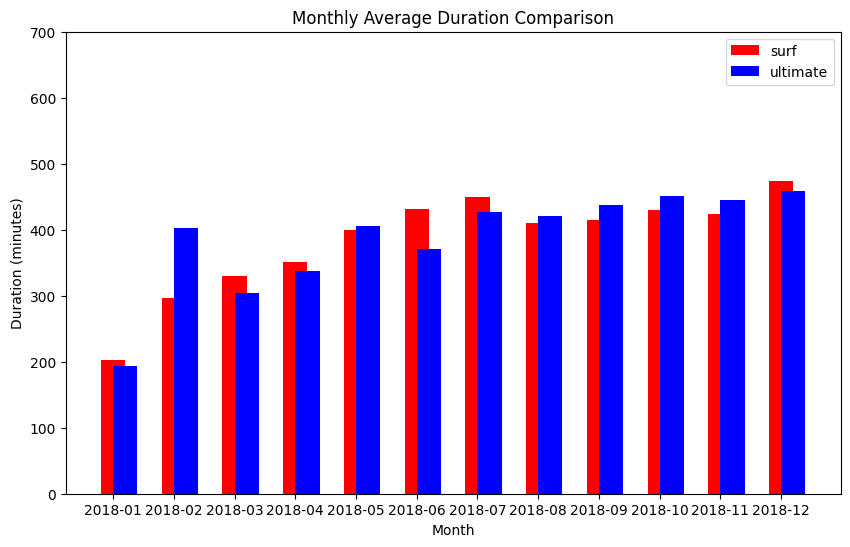

In [56]:
# bar chart
months = avg_duration_monthly['month']
surf = avg_duration_monthly['surf']
ultimate = avg_duration_monthly['ultimate']
plt.figure(figsize=(10, 6))
plt.bar(months, surf, label='surf', color='red', width=0.4, align='center')
plt.bar(months, ultimate, label='ultimate', color='blue', width=0.4, align='edge')
plt.ylim(0, 700)
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.title('Monthly Average Duration Comparison')
plt.legend()
plt.show()

The table above presents a comparison of the **average call durations per month** between users of the **Surf** and **Ultimate** packages.

The maximum average duration for Surf package users is **473.8** minutes, while for the Ultimate package, it is **459** minutes. Although there are instances where a user's call duration exceeds these figures, such occurrences are infrequent enough not to significantly affect the average.

Several findings from the diagram above include:

There is an observed upward trend in the average call durations for both packages throughout the year 2018. However, the average call durations for users of both packages remain below the allocated duration limits (500 minutes for Surf and 3000 minutes for Ultimate). This makes it **relatively challenging to expect consistent surcharges from excess call durations** for both Surf and Ultimate packages.

This situation may be attributed to the availability of alternative options for making phone calls through instant messaging applications such as *FaceTime* and *WhatsApp Call*. These alternatives are often preferred as calls can be made using an internet connection without the concern of tracking the minutes spent or the remaining duration quota.

This assumption will need to be reassessed when analyzing customer behavior related to **web session activities using the internet**.

In [57]:
#comparing monthly total minutes for each package
# Surf users dataset
surf_users = df[df['plan'] == 'surf'].copy()
surf_users.reset_index(drop=True, inplace=True)
surf_users.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call,extra_sms,extra_internet,total_income
0,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
1,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00
2,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.09,70.0,90.09
3,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00
4,1001,2018-12,412.0,19.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.00,40.0,60.00


In [58]:
surf_duration_monthly = pd.pivot_table(surf_users, index='month', values='duration', aggfunc='sum').reset_index()

# change periode M data type to string (for visualization)
surf_duration_monthly['month'] = surf_duration_monthly['month'].astype('str')
surf_duration_monthly

,month,duration
0,2018-01,406.0
1,2018-02,2673.0
2,2018-03,7590.0
3,2018-04,17577.0
4,2018-05,30768.0
5,2018-06,41836.0
6,2018-07,54448.0
7,2018-08,66438.0
8,2018-09,80360.0
9,2018-10,101846.0


In [59]:
# Ultimate users dataset
ultimate_users = df[df['plan'] == 'ultimate'].copy()
ultimate_users.reset_index(drop=True, inplace=True)
ultimate_users.head()

,user_id,month,duration,gb_used,sms_count,age,plan,state,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_included,extra_call,extra_sms,extra_internet,total_income
0,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
1,1006,2018-11,10.0,3.0,15.0,73,ultimate,CA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
2,1006,2018-12,59.0,32.0,139.0,73,ultimate,CA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,14.0,84.0
3,1008,2018-10,476.0,17.0,21.0,53,ultimate,FL,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0
4,1008,2018-11,446.0,24.0,37.0,53,ultimate,FL,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,70.0


In [60]:
ultimate_duration_monthly = pd.pivot_table(ultimate_users, index='month', values='duration', aggfunc='sum').reset_index()

# change periode M data type to string (for visualization)
ultimate_duration_monthly['month'] = ultimate_duration_monthly['month'].astype('str')
ultimate_duration_monthly

,month,duration
0,2018-01,774.0
1,2018-02,2822.0
2,2018-03,3651.0
3,2018-04,7074.0
4,2018-05,11781.0
5,2018-06,17435.0
6,2018-07,25197.0
7,2018-08,29922.0
8,2018-09,37626.0
9,2018-10,47778.0


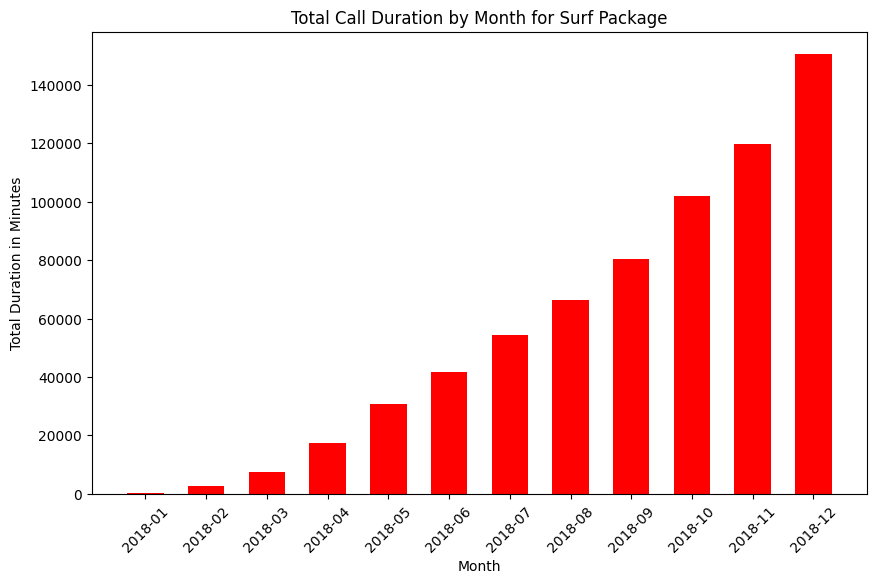

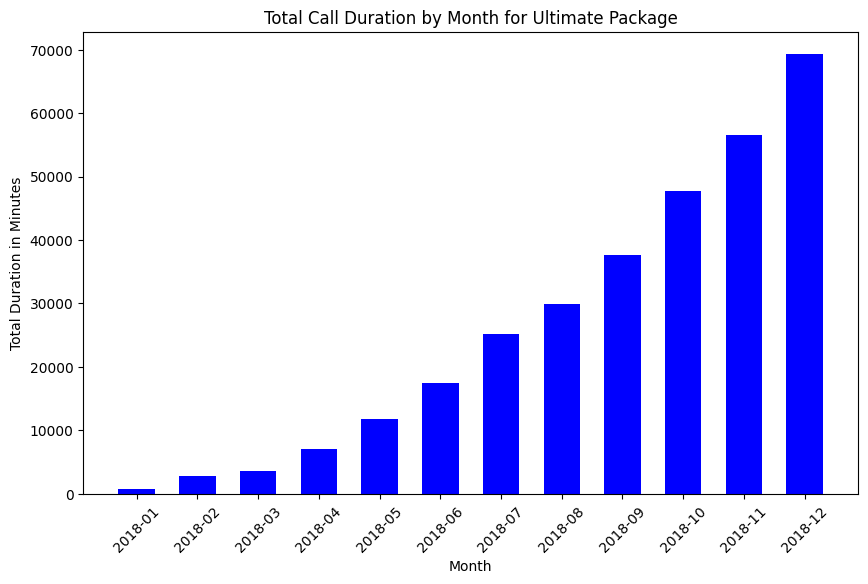

In [61]:
# Histogram of Surf users
months = surf_duration_monthly['month']
duration = surf_duration_monthly['duration']
plt.figure(figsize=(10, 6))
plt.bar(months, duration, color='red', width=0.6)
plt.xlabel('Month')
plt.ylabel('Total Duration in Minutes')
plt.title('Total Call Duration by Month for Surf Package')
plt.xticks(rotation=45) 
plt.show()

# Histogram of Ultimate users
months = ultimate_duration_monthly['month']
duration = ultimate_duration_monthly['duration']
plt.figure(figsize=(10, 6))
plt.bar(months, duration, color='blue', width=0.6)
plt.xlabel('Month')
plt.ylabel('Total Duration in Minutes')
plt.title('Total Call Duration by Month for Ultimate Package')
plt.xticks(rotation=45)
plt.show()


The histogram above indicates a positive trend in call durations. 

This trend may be attributed to the increasing number of new Megaline customers (for both the Surf and Ultimate packages) each month. However, this does not necessarily imply that each customer is making longer phone calls every month, as evidenced by the previous bar chart, which shows that the average call duration remains below 500 minutes.

In [62]:
# calculate deviation standard and variance of monthly phone call duration
# Surf users
surf_duration_std = round(avg_duration_monthly['surf'].std(), 1)
surf_duration_var = round(avg_duration_monthly['surf'].var(), 1)

# Ultimate users
ulti_duration_std = round(avg_duration_monthly['ultimate'].std(), 1)
ulti_duration_var = round(avg_duration_monthly['ultimate'].var(), 1)

print('Duration average of Surf:')
print(f'Deviation tandard: {surf_duration_std} minutes')
print(f'Variance: {surf_duration_var}')
print()
print('Duration average of Ultimate:')
print(f'Deviation standard: {ulti_duration_std} minutes')
print(f'Variance: {ulti_duration_var}')
print()

Duration average of Surf:
Deviation tandard: 76.5 minutes
Variance: 5857.7

Duration average of Ultimate:
Deviation standard: 77.3 minutes
Variance: 5970.0



<AxesSubplot:>

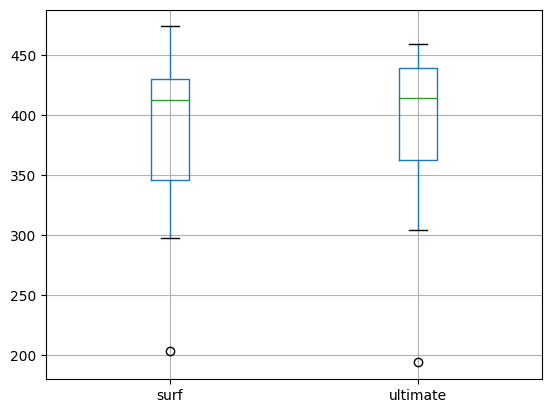

In [63]:
#Boxplot of monthly phone call duration average
avg_duration_monthly.boxplot()

There are both similarities and differences between the boxplots of the Surf and Ultimate packages.

The similarity lies in the median (green line), which is not centered within the boxplot. This observation confirms the previous finding that the difference between the median and mean is relatively large, **indicating a skewed distribution for each package.**

Considering the relatively large standard deviations for both packages, it can be concluded that the **calling behavior of customers for both packages varies significantly**. There are certain months in which customers are more active in making phone calls.

The difference pertains to the distance between the upper and lower whiskers. The distribution for the Surf package exhibits a greater distance between the whiskers, suggesting that **the variability in calling behavior among Surf customers is higher**, while the calling behavior of Ultimate customers remains more consistent month to month.

### Text Messaging Activity

In [64]:
# compare number of text messages sent monthly by package type
avg_sms_monthly = pd.pivot_table(df, index='month', columns='plan', values='sms_count').reset_index()

# change periode M data type to string for visualization
avg_sms_monthly['month'] = avg_sms_monthly['month'].astype('str')
avg_sms_monthly

plan,month,surf,ultimate
0,2018-01,10.500000,15.500000
1,2018-02,12.000000,21.571429
2,2018-03,15.260870,20.250000
3,2018-04,17.400000,22.047619
4,2018-05,24.012987,32.103448
5,2018-06,25.298969,29.340426
6,2018-07,27.033058,32.830508
7,2018-08,28.777778,38.478873
8,2018-09,30.762887,37.895349
9,2018-10,33.839662,39.443396


In [65]:
avg_sms_monthly.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,24.656000,31.089497
std,9.049246,9.346334
min,10.500000,15.500000
25%,16.865217,21.928571
50%,26.166013,32.466978
75%,31.168455,38.510730
max,38.600629,45.006623


The table above provides a brief overview of the average monthly text messages sent for the Surf and Ultimate plans over the course of one year. 

Key findings are as follows:

On average, **Ultimate plan users tend to send more text messages** than those on the Surf plan. This difference is likely attributed to the significantly larger text message quota offered by the Ultimate plan compared to Surf. However, further analysis is needed to determine whether this difference is statistically significant and could serve as a basis for business decisions.

The standard deviation for both plans indicates **moderate variability**, suggesting that while there is some fluctuation in text messaging activity each month, the range of variation is not substantial. Text messaging activity for both plans remains relatively stable across months.

In terms of minimum and maximum values, the **average range for the Ultimate plan is slightly wider** than that of the Surf plan.

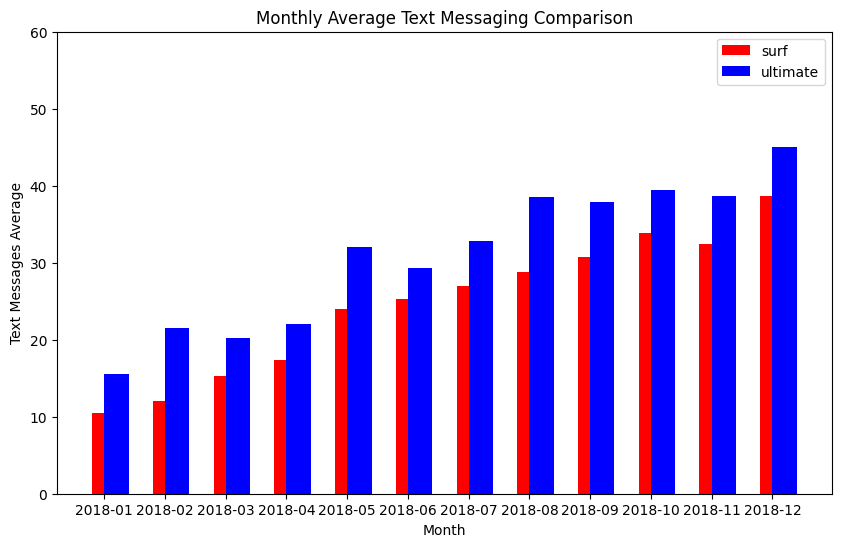

In [66]:
# bar chart of monthly average SMS activity of both packages
months_sms = avg_sms_monthly['month']
surf_sms = avg_sms_monthly['surf']
ultimate_sms = avg_sms_monthly['ultimate']
plt.figure(figsize=(10, 6))
plt.bar(months_sms, surf_sms, label='surf', color='red', width=0.4, align='center')
plt.bar(months_sms, ultimate_sms, label='ultimate', color='blue', width=0.4, align='edge')
plt.ylim(0, 60)
plt.xlabel('Month')
plt.ylabel('Text Messages Average')
plt.title('Monthly Average Text Messaging Comparison')
plt.legend()
plt.show()

The bar chart above illustrates a positive trend, showing an increase in text messaging activity each month for both the Surf and Ultimate plans.

As noted in the previous analysis, on average, Ultimate plan users send more SMS than those on the Surf plan. Therefore, the next step is to assess whether this difference is statistically significant enough to inform Megaline's future business decisions.

The average SMS usage for both plans remains below the allocated quota. While there may be instances where customers exceed their monthly SMS limit, these occurrences are infrequent and inconsistent. **Thus, it would be challenging for the company to rely on SMS activity alone to generate consistent surcharge revenue.**

The low frequency of SMS usage—particularly among Surf plan users—can likely be attributed to the availability of internet-based instant messaging applications on smartphones (i.e. iMessage, WhatsApp), which offer unrestricted messaging. This alternative is often preferred over traditional SMS.

### Web Session Activity

In [67]:
# compare monthly average gigabyte across packages
avg_gb_monthly = pd.pivot_table(df, index='month', columns='plan', values='gb_used').reset_index()

# change data type of M periode to string (for visualization)
avg_gb_monthly['month'] = avg_gb_monthly['month'].astype('str')
avg_gb_monthly

plan,month,surf,ultimate
0,2018-01,5.000000,7.250000
1,2018-02,12.222222,17.285714
2,2018-03,13.565217,18.416667
3,2018-04,12.220000,16.333333
4,2018-05,14.116883,16.862069
5,2018-06,15.484536,15.425532
6,2018-07,16.876033,16.491525
7,2018-08,16.882716,17.845070
8,2018-09,16.690722,17.011628
9,2018-10,17.409283,17.716981


In [68]:
avg_gb_monthly.describe()

plan,surf,ultimate
count,12.000000,12.000000
mean,14.594808,16.346165
std,3.628348,2.991152
min,5.000000,7.250000
25%,13.229469,16.451977
50%,15.957816,17.064869
75%,16.877704,17.749003
max,18.238994,18.416667


The table above provides a summary of the average internet data usage for users of the Surf and Ultimate plans.

On average, **Ultimate plan users consume more data** than Surf plan users.

According to the standard deviation, **internet usage among Ultimate plan users is more consistent**, while Surf plan users show greater variability in their usage.

A bar chart visualization is needed to better understand how the data usage for each plan compares to the maximum data limits included in the respective packages.

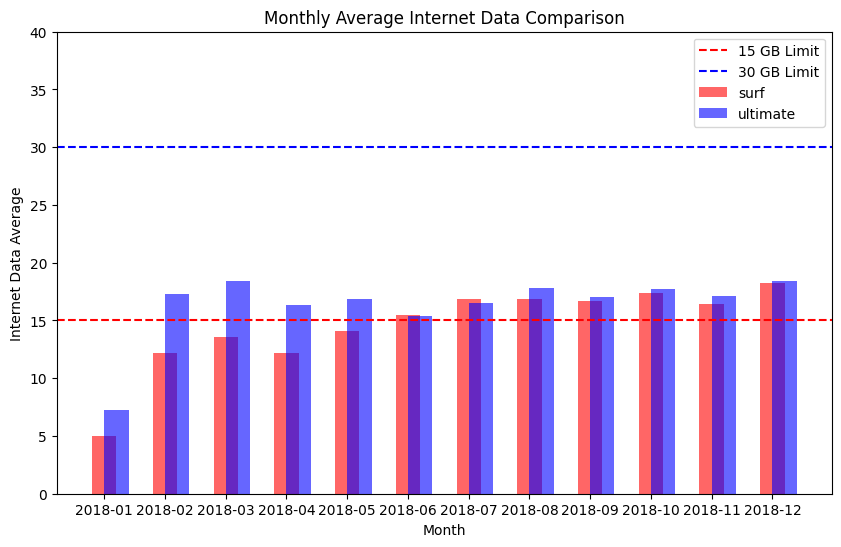

In [69]:
# bar chart of monthly average web session activity across packages
months_gb = avg_gb_monthly['month']
surf_gb = avg_gb_monthly['surf']
ultimate_gb = avg_gb_monthly['ultimate']
plt.figure(figsize=(10, 6))
plt.bar(months_gb, surf_gb, label='surf', color='red', alpha=0.6, width=0.4, align='center')
plt.bar(months_gb, ultimate_gb, label='ultimate', color='blue', alpha=0.6, width=0.4, align='edge')
plt.axhline(y=15, color='red', linestyle='--', label='15 GB Limit')
plt.axhline(y=30, color='blue', linestyle='--', label='30 GB Limit')
plt.ylim(0, 40)
plt.xlabel('Month')
plt.ylabel('Internet Data Average')
plt.title('Monthly Average Internet Data Comparison')
plt.legend()
plt.show()

The bar chart above reveals the following findings:

On average, **internet usage for the Ultimate plan never exceeds the allocated limit** of 30 GB per month. While individual users may occasionally exceed this limit, such instances are neither frequent nor consistent.

In contrast, **Surf plan users have consistently exceeded the 15 GB data limit since June 2018**, resulting in a surcharge of `$10` per additional GB. This trend has continued, with data usage steadily increasing through the end of the year.

This presents a potential revenue opportunity for the company, as data overage charges are the highest compared to excess fees for call duration or SMS.

The consistent overuse of data likely stems from a shift in user behavior, with customers opting to make calls and send messages through internet-based applications. This is supported by previous findings, where average call and SMS activity never exceeded the plan's limits.

[Back to Analysis](#Analysis)

## Revenue

The findings on customer behavior from the previous section form the basis for examining how this behavior impacts company revenue. This section delves deeper into the revenue differences between the two plans.

As mentioned at the beginning of the report, the starting price of the Surf plan is `$20`, while the Ultimate plan is priced at `$70`. The initial price gap is substantial, with a corresponding difference in benefits. 

**A preliminary assumption is that the Ultimate plan generates more revenue**, given that its price is more than three times that of the Surf plan.

In [70]:
#new dataset of monthly revenue generated by both packages
income_monthly = pd.pivot_table(df, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()

#change M periode data type to string
income_monthly['month'] = income_monthly['month'].astype(str)
income_monthly

plan,month,surf,ultimate
0,2018-01,40.00,280.0
1,2018-02,309.57,490.0
2,2018-03,1056.65,896.0
3,2018-04,2035.53,1533.0
4,2018-05,3667.37,2051.0
5,2018-06,4779.80,3367.0
6,2018-07,7583.56,4242.0
7,2018-08,10356.85,5173.0
8,2018-09,11304.67,6195.0
9,2018-10,15504.83,7665.0


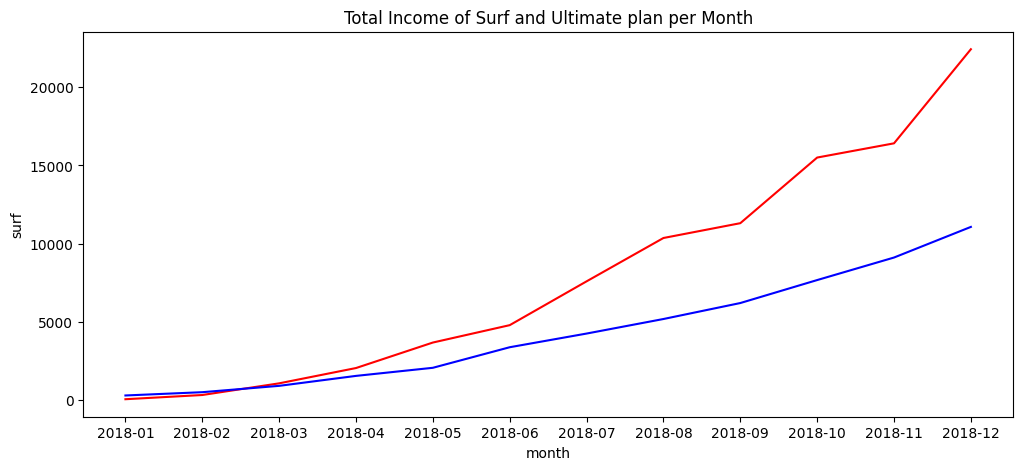

In [71]:
# line chart of table 'total_income'
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_monthly, x="month", y="surf", color='red')
sns.lineplot(data=income_monthly, x="month", y="ultimate", color='blue')
plt.show()

Based on the chart above, the following findings have been identified:

There is a positive trend in monthly revenue for both plans.

In January 2018, the total revenue from the Ultimate plan was higher. However, a shift occurred in March 2018, when revenue from the Surf plan surpassed that of the Ultimate plan. This gap continued to widen, and by the end of the year, revenue from the Surf plan had grown to more than double that of the Ultimate plan.

In [72]:
# dataset of monthly average revenue of both packages
avg_income = pd.pivot_table(df, index='month', columns='plan', values='total_income', aggfunc='mean').reset_index()
avg_income['month'] = avg_income['month'].astype(str)
avg_income

plan,month,surf,ultimate
0,2018-01,20.000000,70.000000
1,2018-02,34.396667,70.000000
2,2018-03,45.941304,74.666667
3,2018-04,40.710600,73.000000
4,2018-05,47.628182,70.724138
5,2018-06,49.276289,71.638298
6,2018-07,62.674050,71.898305
7,2018-08,63.931173,72.859155
8,2018-09,58.271495,72.034884
9,2018-10,65.421224,72.311321


In [73]:
avg_income['ultimate'].describe()

count    12.000000
mean     72.011068
std       1.364068
min      70.000000
25%      71.409758
50%      71.966594
75%      72.894366
max      74.666667
Name: ultimate, dtype: float64

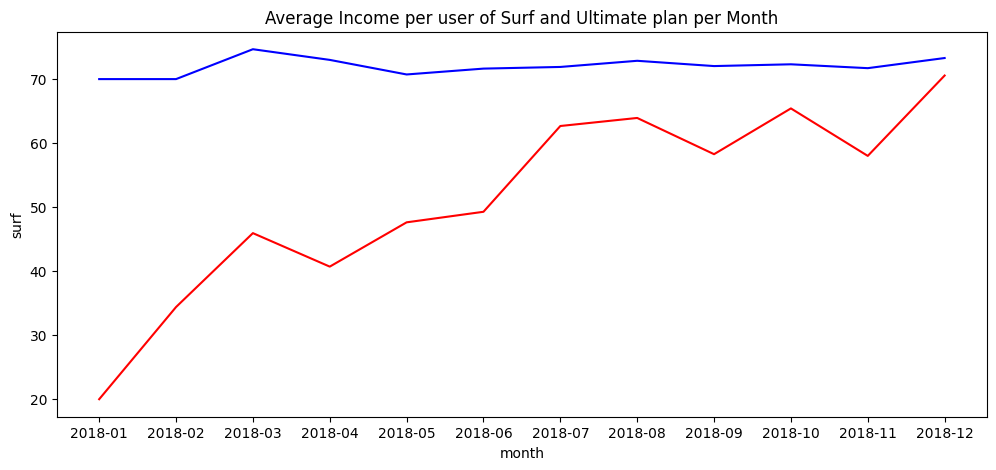

In [74]:
# line chart of monthly average revenue
plt.figure(figsize=(12, 5))
plt.title('Average Income per user of Surf and Ultimate plan per Month')
sns.lineplot(data=avg_income, x="month", y="surf", color='red')
sns.lineplot(data=avg_income, x="month", y="ultimate", color='blue')
plt.show()

The chart above shows that, **on average, the monthly revenue from the Ultimate plan is higher** than that of the Surf plan. The average revenue for the Ultimate plan is also **relatively stable**, with little variation from month to month.

In contrast, the Surf plan exhibits more variability in its average monthly revenue. There is a positive trend, with average revenue increasing each month, reaching its peak in December 2018, where it comes close to the average revenue of the Ultimate plan.

Further analysis is needed to explore the average spending per user over the course of the year.

In [75]:
# new dataset of revenue per user
avg_user = pd.pivot_table(df, index='user_id', columns='plan', values='total_income', aggfunc='mean').reset_index()# Dapatkan user yang surf

# table of average revenue from Surf users
avg_surf = avg_user.loc[:, ['user_id', 'surf']].dropna()
avg_surf.head()

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,158.120000
4,1004,76.250000
5,1005,40.000000


In [76]:
avg_surf['surf'].describe()

count    333.000000
mean      58.194344
std       43.565028
min       20.000000
25%       28.000000
50%       47.180000
75%       72.151111
max      320.185000
Name: surf, dtype: float64

In [77]:
# table of average revenue from Ultimate users
avg_ulti = avg_user.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti.head()

plan,user_id,ultimate
0,1000,70.0
6,1006,77.0
8,1008,70.0
11,1011,70.0
13,1013,70.0


In [78]:
avg_ulti['ultimate'].describe()

count    157.000000
mean      71.823284
std        7.424766
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      121.333333
Name: ultimate, dtype: float64

From the description of each prepaid plan, the following findings have been identified:

There is a significant difference in standard deviation (43.5 for the Surf plan and 7 for the Ultimate plan). This indicates that **the average annual spending of Surf plan users is more variable** compared to Ultimate plan users.

In contrast, the average spending of Ultimate plan users is more consistent, as shown by the data distribution in quartiles 1, 2, and 3, all of which have a value of 70. Additionally, the range between the minimum and maximum values is smaller for the Ultimate plan compared to the Surf plan.

Below is a histogram visualization to validate these assumptions for both plans.

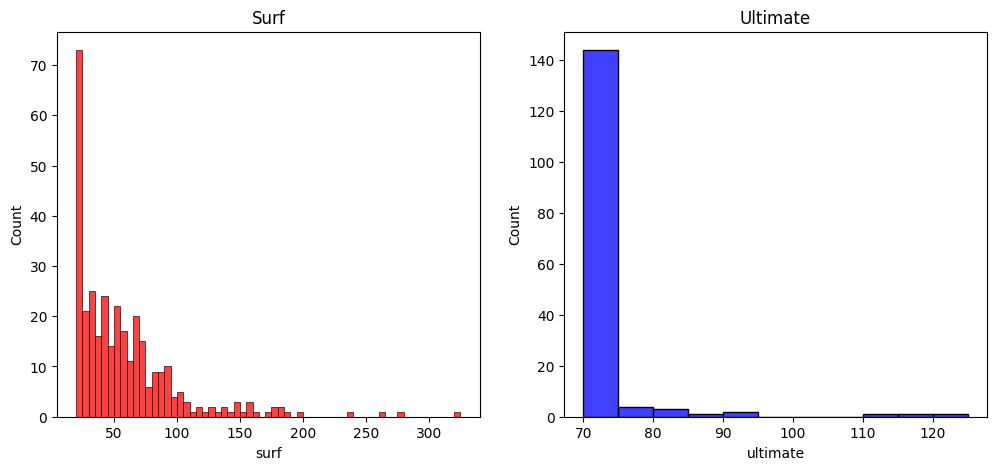

In [79]:
#histogram of average revenue per user (Surf package)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(avg_surf['surf'], binwidth=5, color='red')

#histogram of average revenue per user (Ultimate package)
plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(avg_ulti['ultimate'], binwidth=5, color='blue')
plt.show()

The histogram for the Surf plan shows that the average spending per user is more varied. Most users fall within the `$20-$30` range. However, a notable number of users also have average spending around `$70` (the price of the Ultimate plan) or even higher.

The histogram for the Ultimate plan displays lower variability, as evidenced by the large number of users with average spending in the `$70-$75` range.

The following is the variance calculation, which will help determine whether to use parametric or non-parametric statistical methods for the hypothesis testing phase.

In [80]:
# Variance and Deviation Standard of monthly revenue
# Surf
surf_std = round(avg_surf['surf'].std(), 1)
surf_var = round(avg_surf['surf'].var(), 1)
print('Surf:')
print(f'Deviation standard: ${surf_std}')
print(f'Variance: {surf_var}')
print()
ulti_std = round(avg_ulti['ultimate'].std(), 1)
ulti_var = round(avg_ulti['ultimate'].var(), 1)

# Ultimate
print('Ultimate:')
print(f'Deviation standard: ${ulti_std}')
print(f'Variance: {ulti_var}')

Surf:
Deviation standard: $43.6
Variance: 1897.9

Ultimate:
Deviation standard: $7.4
Variance: 55.1


The level of variability in the Surf plan is significantly higher compared to the Ultimate plan. To ensure reliable results, a normality test must be conducted before proceeding with hypothesis testing. This will help determine the appropriate significance test to use.

In [81]:
# function for normality test
def normality_test(series):
    p_value_shapiro = shapiro(series).pvalue
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha  : {alpha}')
    if p_value_shapiro >= alpha:
        print('Fail to reject H0. Data exhibits normal distribution')
    else:
        print('H0 rejected. Data does NOT exhibit normal distribution')


In [82]:
# apply function on average revenue by Surf users
alpha = 0.05
normality_test(avg_surf['surf'])

P-Value: 5.548590627996112e-21
Alpha  : 0.05
H0 rejected. Data does NOT exhibit normal distribution


In [83]:
# apply function on average revenue by Ultimate users
alpha = 0.05
normality_test(avg_ulti['ultimate'])

P-Value: 1.0645181919663397e-24
Alpha  : 0.05
H0 rejected. Data does NOT exhibit normal distribution


The normality test indicates that the distribution of both datasets is non-normal. Based on this finding, the significance test for differences in the hypothesis testing phase should employ a **non-parametric statistical** approach.

<span style="font-size:14pt; font-weight: bold;">Preliminary Conclusions</span>

The Surf and Ultimate packages are offered at significantly different initial prices. The number of customers for the Surf package (333) is twice that of the Ultimate package (157). If the average expenditure for each customer in the Surf and Ultimate packages aligns with their respective initial prices (`$20` and `$70`), the company's revenue proportion from the Ultimate package should be approximately double that from the Surf package.

However, by the end of the year, revenue from the Surf package is actually twice that of the Ultimate package. The spending behavior of Ultimate package users appears to remain consistently close to the initial price. In contrast, Surf package users exhibit more variability, with over three-quarters of total users incurring surcharges due to excess usage.

The surcharges incurred by Surf package users primarily stem from **internet data usage for web sessions**. The high level of web activity is understandable, given the widespread use of internet-based messaging applications that replace traditional SMS and phone calls. Moreover, the payment terms for exceeding internet data limits further benefit the company. Each megabyte is rounded up to 1 gigabyte, with a charge of `$10` per GB (half the initial price of the Surf package). Consequently, as illustrated in the histogram of average spending among Surf package users, approximately one-quarter of the total users spend `$70`, equivalent to the price of the Ultimate package, for significantly lower benefits.

One consideration for the company is to ensure the satisfaction of Surf package customers. Given the relatively consistent incidence of surcharges, despite the competitive initial price of the Surf package, consumers who average `$70` or more in expenditures could be approached to transition to the Ultimate package, thereby maintaining customer satisfaction and preventing subscription cancellations.

[Back to Analysis](#Analysis)

[Back to Contents](#contents)

# Hypothesis Testing

Section 3 of this report highlights the differences in average revenue between customers of the Surf and Ultimate packages. However, before these differences can be used as a basis for decision-making, it is essential to test whether the differences are statistically significant.

This section focuses on hypothesis testing concerning:

1. The significance of the difference in average revenue between the Surf and Ultimate packages.
2. The significance of the difference in average revenue between users in the NY-NJ region and users in other regions.

## Average Revenue by Package

**Significance of the Difference in Average Revenue Between the Surf and Ultimate Packages**

Subscription to the Surf package and the Ultimate package are mutually exclusive and independent events. The sample of customers subscribed to the Surf package is independent of the sample of customers subscribed to the Ultimate package.

Based on the normality test, both distributions are not normally distributed, which means that the independent samples t-test cannot be used to obtain reliable results. Hypothesis testing will be conducted using the **Mann-Whitney U test** as the nonparametric equivalent of the independent samples t-test, with an alpha level of 0.05.

**H0**: There is NO significant difference between the average revenue of users subscribed to the Surf package and the average revenue of users subscribed to the Ultimate package.

**H1**: There IS a significant difference between the average revenue of users subscribed to the Surf package and the average revenue of users subscribed to the Ultimate package.

In [84]:
# Uji hipotesis
alpha = 0.05
p_value = mannwhitneyu(avg_surf['surf'], avg_ulti['ultimate'], nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('Fail to reject H0: There is NO significant difference between the average revenue generated by users of the Surf plan and those of the Ultimate plan.')
else:
    print('H0 rejected: There IS significant difference between the average revenue generated by users of the Surf plan and those of the Ultimate plan.')

Alpha  : 0.05
P-Value: 1.3074481118017472e-18
H0 rejected: There IS significant difference between the average revenue generated by users of the Surf plan and those of the Ultimate plan.


The Mann-Whitney U hypothesis test, conducted at an alpha level of 0.05, resulted in the rejection of the null hypothesis and the acceptance of the alternative hypothesis.

**There is a significant difference between the average revenue** generated by users of the Surf plan and the average revenue generated by users of the Ultimate plan.

[Back to Hypothesis Testing](#Hypothesis-Testing)

## Average Revenue by Location

This section conducts a significance test concerning the differences in revenue among customers based on their residential areas. 

**H0:** There is no significant difference between the average revenue generated by customers in the NY-NJ region and that of customers in other regions.

**H1:** There is a significant difference between the average revenue generated by customers in the NY-NJ region and that of customers in other regions.

In [85]:
# new dataset of revenue by location
avg_location = pd.pivot_table(df, index='month', columns='is_nynj', values='total_income', aggfunc='mean').reset_index()
avg_location.columns = ["month", "Others", "NY-NJ"]
avg_location

,month,Others,NY-NJ
0,2018-01,53.333333,NaN
1,2018-02,50.683571,45.000000
2,2018-03,58.821034,41.140000
3,2018-04,52.506316,41.119286
4,2018-05,55.170455,47.965000
5,2018-06,58.808908,45.941600
6,2018-07,68.380136,53.747879
7,2018-08,68.487865,58.053171
8,2018-09,62.979528,60.115745
9,2018-10,67.266034,69.107170


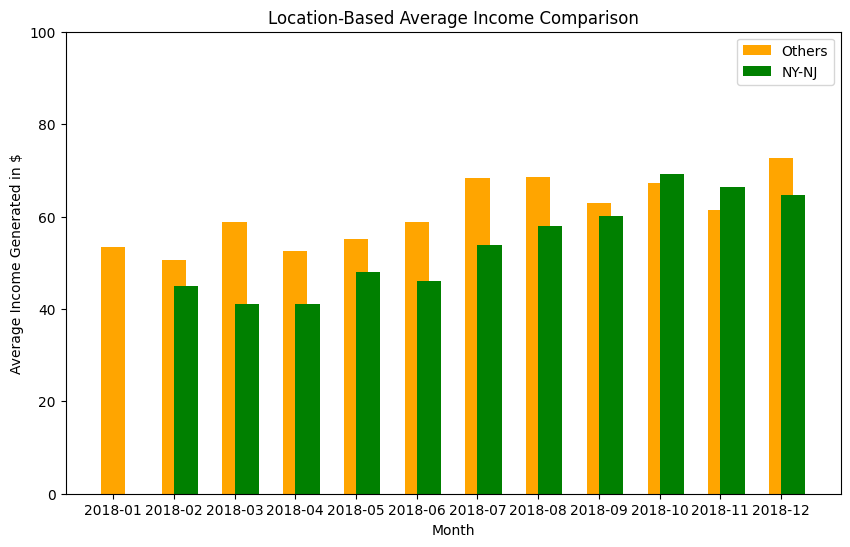

In [86]:
#visualize dataset of average revenue from users in NY-NJ region
avg_location['month'] = avg_location['month'].astype('str')
months = avg_location['month']
others = avg_location['Others']
nynj = avg_location['NY-NJ']
plt.figure(figsize=(10, 6))
plt.bar(months, others, label='Others', color='orange', width=0.4, align='center')
plt.bar(months, nynj, label='NY-NJ', color='green', width=0.4, align='edge')
plt.ylim(0, 100)
plt.xlabel('Month')
plt.ylabel('Average Income Generated in $')
plt.title('Location-Based Average Income Comparison')
plt.legend()
plt.show()

Based on the bar chart above, there are more months in which the average revenue from users in the NY-NJ region is lower compared to other regions.

Before testing the hypothesis, a normality test will be conducted on the distribution of both datasets.

In [87]:
#apply normality test function for NY-NJ revenue
alpha = 0.05
normality_test(avg_location['NY-NJ'])

P-Value: 1.0
Alpha  : 0.05
Fail to reject H0. Data exhibits normal distribution


In [88]:
#apply normality test function for other regions revenue
alpha = 0.05
normality_test(avg_location['Others'])

P-Value: 0.6214646100997925
Alpha  : 0.05
Fail to reject H0. Data exhibits normal distribution


In [89]:
# variance check
# revenue from NY-NJ
nynj_std = round(avg_location['NY-NJ'].std(), 1)
nynj_var = round(avg_location['NY-NJ'].var(), 1)
print('NY-NJ:')
print(f'Deviation standard: ${nynj_std}')
print(f'Variance: {nynj_var}')
print()
others_std = round(avg_location['Others'].std(), 1)
others_var = round(avg_location['Others'].var(), 1)

# revenue from other regions
print('Others:')
print(f'Deviation standard: ${others_std}')
print(f'Variance: {others_var}')

NY-NJ:
Deviation standard: $10.3
Variance: 106.1

Others:
Deviation standard: $7.2
Variance: 52.1


"Residing in the NY-NJ region" and "residing in other regions" are mutually exclusive and independent events. The sample of Surf plan customers is independent of the sample of Ultimate plan customers.

According to the normality test, both distributions are approximately normal; however, their variances differ significantly. Therefore, the hypothesis testing will be conducted using parametric statistics, employing **Welch's t-test** with an alpha level of 0.05.

In [90]:
# Hypotesis testing
avg_other = avg_location["Others"]
avg_nynj = avg_location["NY-NJ"]
t_stat, p_value = stats.ttest_ind(avg_other, avg_nynj, equal_var=False, nan_policy='omit')
alpha = 0.05

print(f"T-Statistic: {t_stat}")
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('Fail to reject H0: There is NO significant difference between the average revenue generated in the NY-NJ region and that generated in other regions.')
else:
    print('H0 is rejected: There IS a significant difference between the average revenue generated in the NY-NJ region and that generated in other regions')

T-Statistic: 1.8633428127035778
Alpha  : 0.05
P-Value: 0.07903841126977762
Fail to reject H0: There is NO significant difference between the average revenue generated in the NY-NJ region and that generated in other regions.


The Welch's t-test hypothesis test, conducted at an alpha level of 0.05, indicates that the null hypothesis fails to be rejected. There is **no significant difference** between the average revenue generated by users in the NY-NJ region and that generated by users in other regions.

[Back to Hypothesis Testing](#Hypothesis-Testing)

[Back to Contents](#contents)

# Findings and Conclusions

<span style="font-size:14pt; font-weight: bold;">Findings</span>

Two prepaid packages offered by Megaline each come with distinct advantages and disadvantages. The Surf package has a relatively low base price but imposes high surcharges when customers exceed the allocated limits for phone call duration, SMS count, or internet data. On the other hand, the Ultimate package offers a higher base price but includes significantly more generous allocations for calls, SMS, and internet data. Additionally, the surcharges applied to the Ultimate package are lower than those for the Surf package. By the end of 2018, there were 333 subscribers to the Surf package and 157 subscribers to the Ultimate package.

User behavior was observed monthly across three metrics: call duration, SMS count, and web session activity (internet usage). On average, both Surf and Ultimate users remained within their respective allocations for call duration and SMS count. However, when it came to internet usage, Surf package users frequently exceeded their allocated data, resulting in substantial surcharges of $10 per gigabyte. In contrast, this pattern was not observed among Ultimate package users. Although their web session activity was comparable to Surf users, the high data allocation of the Ultimate package made it unlikely for any of its users to incur surcharges.

This pattern of exceeding data limits significantly contributed to the increase in both total revenue and average revenue per user for the Surf package throughout the year. By the end of the year, **total revenue generated by Surf users was nearly twice that of the Ultimate package**. The average revenue per Surf user also showed an upward trend, almost matching the average revenue per Ultimate user by year’s end.

Hypothesis testing confirmed a significant difference in average revenue between the Surf and Ultimate packages. The positive trend in web session activity among Surf users, if sustained, will continue to drive profitability for the company. However, customer satisfaction among Surf users requires careful monitoring. While the lower initial price of the Surf package is an attractive feature, many customers end up paying high surcharges, with some even reaching or exceeding `$ 70`; equivalent to the base price of the Ultimate package but for significantly fewer benefits. If left unaddressed, this issue could lead to customer churn. Given the consistent incidence of surcharges  among Surf users, the company could consider **proactively offering an upgrade to the Ultimate package** when a Surf user’s total payments approach `$ 70`.

In contrast, Ultimate package users exhibited more consistent behavior. There was little variation in their internet usage, call durations, or SMS counts from month to month. For this group, the company’s primary strategy should be focused on **customer retention**. One way to achieve this could be by increasing the allocations for calls, SMS, and data without raising the base price. Since Ultimate users rarely exceed their package limits, this strategy would not result in financial loss for the company but would likely enhance the users’ **emotional perception** of receiving additional value at no extra cost.

Hypothesis testing was also conducted to compare the average revenue per user between the New York & New Jersey (NY-NJ) region and other regions. Although the average revenue per user outside of NY-NJ was often higher, **the difference was not statistically significant**. If the company plans to engage in location-based marketing, further analysis would be needed to identify more substantial regional differences or other significant location-based variables.

<span style="font-size:14pt; font-weight: bold;">Conclusions</span>

The analysis of Megaline’s prepaid packages highlights distinct customer behaviors and revenue dynamics. While the Surf package attracts users with a low base price, its high surcharges for exceeding data limits drive substantial revenue growth. However, many Surf customers end up paying amounts comparable to the Ultimate package, raising the risk of dissatisfaction and potential churn. To mitigate this, the company could offer targeted upgrades when Surf customers’ payments approach the Ultimate price.

In contrast, Ultimate users show consistent usage patterns within their generous limits, suggesting that retention strategies such as increasing service allocations without raising prices could boost satisfaction. The hypothesis tests confirm a significant revenue difference between the packages but reveal no meaningful regional differences, indicating that more granular segmentation is needed for location-based marketing efforts. Overall, the company can leverage the Surf package's revenue potential while managing satisfaction and focus on retaining Ultimate customers.

 [Back to Contents](#contents)